# Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('movies_complete.csv', parse_dates=['release_date'])
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [14]:
from IPython.display import HTML

In [15]:
df_best = df[['poster_path','title','budget_musd','revenue_musd','vote_count'
              ,'vote_average', 'popularity']].copy()
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
180,<img src='http://image.tmdb.org/t/p/w185//l1DF...,Mute Witness,0.000002,0.000001,36.0,6.4,2.466066
25706,<img src='http://image.tmdb.org/t/p/w185//o2xN...,A Cry in the Wild,NaN,0.000001,6.0,6.7,0.802270
7140,<img src='http://image.tmdb.org/t/p/w185//nsOM...,The Wind in the Willows,0.000012,0.000001,16.0,4.9,1.410322
41970,<img src='http://image.tmdb.org/t/p/w185//kWbi...,Missing,NaN,0.000001,2.0,4.3,0.229233
34615,<img src='http://image.tmdb.org/t/p/w185//8qnZ...,The Letters,0.000001,0.000001,10.0,5.6,2.240259


In [18]:
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
180,<img src='http://image.tmdb.org/t/p/w185//l1DF...,Mute Witness,0.000002,0.000001,36.0,6.4,2.466066,-0.000001,0.500000
25706,<img src='http://image.tmdb.org/t/p/w185//o2xN...,A Cry in the Wild,NaN,0.000001,6.0,6.7,0.802270,NaN,NaN
7140,<img src='http://image.tmdb.org/t/p/w185//nsOM...,The Wind in the Willows,0.000012,0.000001,16.0,4.9,1.410322,-0.000011,0.083333
41970,<img src='http://image.tmdb.org/t/p/w185//kWbi...,Missing,NaN,0.000001,2.0,4.3,0.229233,NaN,NaN
34615,<img src='http://image.tmdb.org/t/p/w185//8qnZ...,The Letters,0.000001,0.000001,10.0,5.6,2.240259,0.000000,1.000000


In [22]:
df_best.columns = ['', 'Title', 'Budget', 'Revenue', 'Votes', 'Average Rating',
                  'Popularity','Profit','ROI']

In [23]:
df_best.set_index('Title', inplace = True)

In [26]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//l1DFLfeEkDJ4LjNcwQFDowtJ9Rg.jpg' style='height:100px;'>"

In [28]:
subset = df_best.iloc[:5, :2]
subset

,,Budget
Title,,
Mute Witness,<img src='http://image.tmdb.org/t/p/w185//l1DF...,0.000002
A Cry in the Wild,<img src='http://image.tmdb.org/t/p/w185//o2xN...,NaN
The Wind in the Willows,<img src='http://image.tmdb.org/t/p/w185//nsOM...,0.000012
Missing,<img src='http://image.tmdb.org/t/p/w185//kWbi...,NaN
The Letters,<img src='http://image.tmdb.org/t/p/w185//8qnZ...,0.000001


In [29]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Mute Witness,,0.000002
A Cry in the Wild,,NaN
The Wind in the Willows,,0.000012
Missing,,NaN
The Letters,,0.000001


In [30]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    
    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [31]:
best_worst(n = 5, by = "Revenue")

,,Revenue
Title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


__Movies Top 5 - Highest Budget__

In [32]:
best_worst(n = 5, by = "Budget")

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Transformers: The Last Knight,,260.0


__Movies Top 5 - Highest Profit__

In [42]:
best_worst(n = 5, by = "Profit")

,,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


__Movies Top 5 - Lowest Profit__

In [37]:
best_worst(n = 5, by = "Profit", ascending = False)

,,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


__Movies Top 5 - Highest ROI__

In [41]:
best_worst(n = 5, by = "ROI", min_bud = 5)

,,ROI
Title,,
E.T. the Extra-Terrestrial,,75.520507
My Big Fat Greek Wedding,,73.748809
Star Wars,,70.490728
Jaws,,67.236286
Crocodile Dundee,,65.640701


__Movies Top 5 - Lowest ROI__

In [52]:
best_worst(n = 5, by = "ROI", ascending = True, min_bud = 200)

,,ROI
Title,,
The Lone Ranger,,0.350157
John Carter,,1.092843
Green Lantern,,1.099256
Superman Returns,,1.448449
Battleship,,1.449883


__Movies Top 5 - Most Votes__

In [53]:
best_worst(n = 5, by = "Votes")

,,Votes
Title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


__Movies Top 5 - Highest Rating__

In [55]:
best_worst(n = 5, by = "Average Rating", min_votes = 10)

,,Average Rating
Title,,
Dilwale Dulhania Le Jayenge,,9.1
Stop Making Sense,,8.7
Tosun Pasha,,8.6
Human,,8.6
The Godfather,,8.5


__Movies Top 5 - Lowest Rating__

In [57]:
best_worst(n = 5, by = "Average Rating", ascending = True, min_votes = 100)

,,Average Rating
Title,,
House of the Dead,,2.8
Dragonball Evolution,,2.9
Battlefield Earth,,3.0
Alone in the Dark,,3.1
Disaster Movie,,3.1


__Movies Top 5 - Most Popular__

In [58]:
best_worst(n = 5, by = "Popularity", min_votes = 10)

,,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [100]:
def search_genre_actor(genre1, genre2, actor):
    mask_genres = df.genres.str.contains(genre1) & df.genres.str.contains(genre2)
    mask_actor = df.cast.str.contains(actor)
    find = df.loc[mask_actor & mask_genres, 
                   ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False).set_index("title")
    return HTML(find.to_html(escape=False))

In [101]:
search_genre_actor("Action", "Science Fiction" ,"Bruce Willis")

,poster_path,vote_average
title,,
The Fifth Element,,7.3
Looper,,6.6
Armageddon,,6.5
Surrogates,,5.9
G.I. Joe: Retaliation,,5.4
Vice,,4.1


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [103]:
def search_actor_director(actor, director):
    mask_director = df.director == director
    mask_actor = df.cast.str.contains(actor)
    final = df.loc[mask_director & mask_actor, 
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")
    return HTML(quentin.to_html(escape=False))

In [104]:
search_actor_director("Uma Thurman","Quentin Tarantino")

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [111]:
def successful_productions(production, year1, year2):
    mask_productions = df.production_companies.str.contains(production).fillna(False)
    mask_time = df.release_date.between(year1,year2)
    final = df.loc[mask_productions & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")
    return HTML(final.to_html(escape=False))

In [112]:
successful_productions("Pixar", "2010-01-01", "2015-12-31")

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.969703,2010-06-16
Inside Out,,857.611174,2015-06-09
Monsters University,,743.559607,2013-06-20
Cars 2,,559.852396,2011-06-11
Brave,,538.983207,2012-06-21
The Good Dinosaur,,331.926147,2015-11-14
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [113]:
def search_genre_lang_rating(genre, lang, rating):
    mask_genre = df.genres.str.contains(genre)
    mask_lang = df.original_language == lang
    mask_vote = df.vote_average >= rating
    mask_vote_co = df.vote_count >= 10
    
    next_mov = df.loc[mask_genre & mask_lang & mask_vote & mask_vote_co, 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)
    return HTML(next_mov.to_html(escape=False))

In [114]:
search_genre_lang_rating("Action","en",7.5)

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Logan,,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.5,7993.0,2015-12-15
Kung Fury,,Action|Comedy|Science Fiction|Fantasy,7.6,762.0,2015-05-22
Kingsman: The Secret Service,,Crime|Comedy|Action|Adventure,7.6,6069.0,2015-01-29
Big Hero 6,,Adventure|Family|Animation|Action|Comedy,7.8,6289.0,2014-10-24
Guardians of the Galaxy,,Action|Science Fiction|Adventure,7.9,10014.0,2014-07-30


## What are the most common Words in Movie Titles and Taglines?

In [116]:
from wordcloud import WordCloud

In [117]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [121]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [122]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

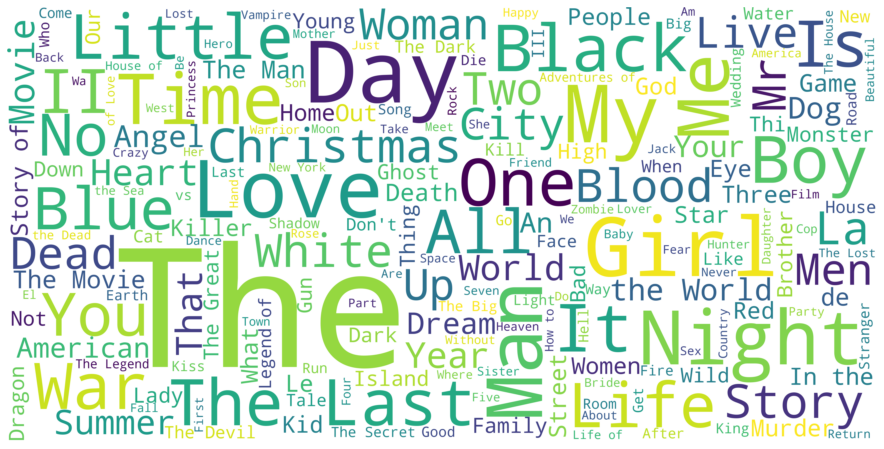

In [123]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

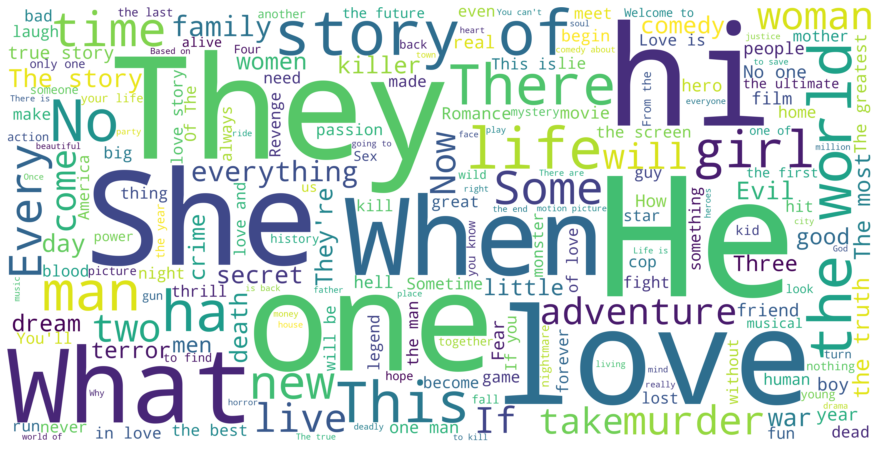

In [124]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

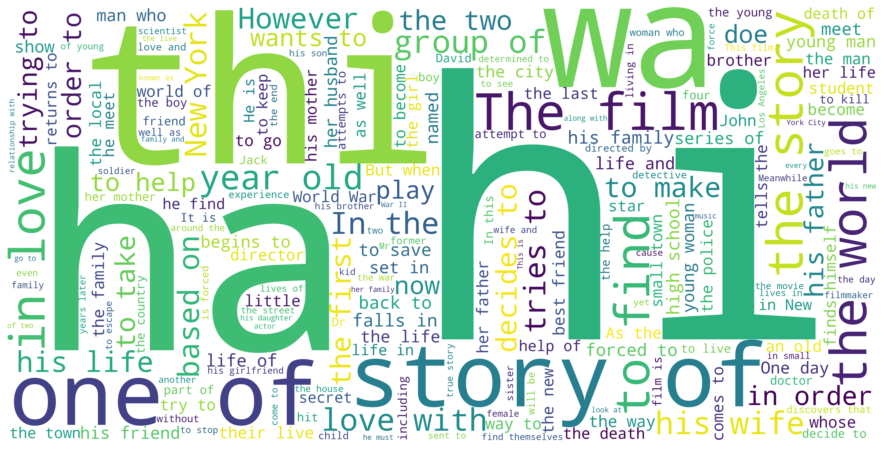

In [125]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [126]:
df.belongs_to_collection

180      NaN
25706    NaN
7140     NaN
41970    NaN
34615    NaN
        ... 
44686    NaN
44687    NaN
44688    NaN
44689    NaN
44690    NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [127]:
df["Franchise"] = df.belongs_to_collection.notna()

In [129]:
df.Franchise

180      False
25706    False
7140     False
41970    False
34615    False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: Franchise, Length: 44691, dtype: bool

In [131]:
df.Franchise.value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [133]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [134]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [135]:
df.groupby("Franchise").ROI.median()

Franchise
False    1.619699
True     3.709195
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [136]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [137]:
df.groupby("Franchise").popularity.mean()

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [138]:
df.groupby("Franchise").vote_average.mean()

Franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [139]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.047741,44.742814,6.008787,2.592726,1.619699,78.289550
True,38.319847,165.708193,5.956806,6.245051,3.709195,412.387856


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [140]:
df.belongs_to_collection

180      NaN
25706    NaN
7140     NaN
41970    NaN
34615    NaN
        ... 
44686    NaN
44687    NaN
44688    NaN
44689    NaN
44690    NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [141]:
df.belongs_to_collection.value_counts()

The Bowery Boys                        29
Totò Collection                        27
James Bond Collection                  26
Zatôichi: The Blind Swordsman          26
The Carry On Collection                25
                                       ..
Ivan Brovkin Collection                 1
Action Pack Bandit Films Collection     1
The Cutlass Collection                  1
I pompieri - Collezione                 1
Swordsman Collection                    1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [144]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [145]:
franchises.nlargest(20, ("title", "count"))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   
Uuno Turhapuro                            15      0.0000        NaN   
Monster High Collection                   14      0.5000   0.500000   
The Land Before Time Collection           14     12.3000  12.300000   
George Carlin Comedy Collection           13      0.0000        NaN   
Sharpe Collection                         13      0.0000        NaN   
Friday the 13th Collection                12     84.4000   7.033333   
Johan Falk GSI Collection                 12      0.0000        NaN   
Sherlock Holmes (1939 series)             12      0.0000        NaN   
The Amityville Horror Collection          12     21.0200   5.255000   
An American Girl Collection               10      6.8000   6.800000   

                                       revenue_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     6.675000   
Totò Collection                            0.000000         NaN     6.837037   
James Bond Collection                   7106.970239  273.345009     6.338462   
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846   
The Carry On Collection                    0.000000         NaN     6.168000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524   
Pokémon Collection                       601.865958   66.873995     6.055000   
Godzilla (Showa) Collection                0.000000         NaN     5.975000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333   
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667   
Uuno Turhapuro                             0.000000         NaN     5.526667   
Monster High Collection                    0.000000         NaN     6.485714   
The Land Before Time Collection           84.460846   84.460846     6.164286   
George Carlin Comedy Collection            0.000000         NaN     7.469231   
Sharpe Collection                          0.000000         NaN     6.738462   
Friday the 13th Collection               464.898544   38.741545     5.425000   
Johan Falk GSI Collection                  0.000000         NaN     6.500000   
Sherlock Holmes (1939 series)              0.000000         NaN     6.925000   
The Amityville Horror Collection         213.347083   53.336771     4.358333   
An American Girl Collection                0.000000         NaN     5.250000   

                                       popularity        ROI   vote_count  
                                             mean     median         mean  
belongs_to_collection                                                      
The Bowery Boys                          0.198006        NaN     0.724138  
Totò Collection                          1.047324        NaN    18.037037  
James Bond Collection                   13.453502   6.128922  1284.307692  
Zatôichi: The Blind Swordsman            1.100603        NaN    11.192308  
The Carry On Collection         

In [146]:
franchises.nlargest(20, ("revenue_musd", "mean"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Avatar Collection                       1      237.00  237.000000   
The Avengers Collection                 2      500.00  250.000000   
Frozen Collection                       2      150.00  150.000000   
Finding Nemo Collection                 2      294.00  147.000000   
The Hobbit Collection                   3      750.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
Despicable Me Collection                6      299.00   74.750000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
The Secret Life of Pets Collection      1       75.00   75.000000   
Transformers Collection                 5      965.00  193.000000   
Spider-Man Collection                   3      597.00  199.000000   
The Dark Knight Collection              3      585.00  195.000000   
Wonder Woman Collection                 1      149.00  149.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Fantastic Beasts Collection             1      180.00  180.000000   
Iron Man Collection                     3      540.00  180.000000   
The Lion King Collection                4       45.00   45.000000   
Deadpool Collection                     1       58.00   58.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Avatar Collection                    2787.965087  2787.965087     7.200000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
Frozen Collection                    1274.219009  1274.219009     7.100000   
Finding Nemo Collection              1968.906425   984.453213     7.200000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   
The Secret Life of Pets Collection    875.457937   875.457937     5.900000   
Transformers Collection              4366.101244   873.220249     6.140000   
Spider-Man Collection                2496.346518   832.115506     6.466667   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Wonder Woman Collection               820.580447   820.580447     7.200000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Fantastic Beasts Collection           809.342332   809.342332     7.200000   
Iron Man Collection                  2424.547547   808.182516     6.933333   
The Lion King Collection              788.241776   788.241776     6.750000   
Deadpool Collection                   783.112979   783.112979     7.400000   

                                     popularity        ROI    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
Avatar Collection                    185.070892  11.763566  12114.000000  
The Avengers Collection               63.633534   5.963190   9454.000000  
Frozen Collection                     16.878788   8.494793   3035.000000  
Finding Nemo Collection               19.987735   7.573212   5312.500000  
The Hobbit Collection                 25.205614   3.833600   5981.333333  
The Lord of the Rings Collection      30.272873  11.7

In [147]:
franchises.nlargest(20, ("budget_musd", "mean"))

title budget_musd              \
                                        count         sum        mean   
belongs_to_collection                                                   
Tangled Collection                          2       260.0  260.000000   
Pirates of the Caribbean Collection         5      1250.0  250.000000   
The Avengers Collection                     2       500.0  250.000000   
The Hobbit Collection                       3       750.0  250.000000   
Man of Steel Collection                     2       475.0  237.500000   
Avatar Collection                           1       237.0  237.000000   
The Amazing Spider-Man Collection           2       415.0  207.500000   
World War Z Collection                      1       200.0  200.000000   
Spider-Man Collection                       3       597.0  199.000000   
The Dark Knight Collection                  3       585.0  195.000000   
Transformers Collection                     5       965.0  193.000000   
Captain America Collection                  3       560.0  186.666667   
The Chronicles of Narnia Collection         3       560.0  186.666667   
Alice in Wonderland Collection              2       370.0  185.000000   
Guardians of the Galaxy Collection          2       370.0  185.000000   
Fantastic Beasts Collection                 1       180.0  180.000000   
Iron Man Collection                         3       540.0  180.000000   
Pacific Rim Collection                      1       180.0  180.000000   
Star Trek: Alternate Reality Collection     3       525.0  175.000000   
Cars Collection                             3       495.0  165.000000   

                                        revenue_musd               \
                                                 sum         mean   
belongs_to_collection                                               
Tangled Collection                        591.794936   591.794936   
Pirates of the Caribbean Collection      4521.576826   904.315365   
The Avengers Collection                  2924.961604  1462.480802   
The Hobbit Collection                    2935.523356   978.507785   
Man of Steel Collection                  1536.105712   768.052856   
Avatar Collection                        2787.965087  2787.965087   
The Amazing Spider-Man Collection        1457.933289   728.966645   
World War Z Collection                    531.865000   531.865000   
Spider-Man Collection                    2496.346518   832.115506   
The Dark Knight Collection               2463.716216   821.238739   
Transformers Collection                  4366.101244   873.220249   
Captain America Collection               2238.640841   746.213614   
The Chronicles of Narnia Collection      1584.144587   528.048196   
Alice in Wonderland Collection           1324.861194   662.430597   
Guardians of the Galaxy Collection       1636.744770   818.372385   
Fantastic Beasts Collection               809.342332   809.342332   
Iron Man Collection                      2424.547547   808.182516   
Pacific Rim Collection                    407.602906   407.602906   
Star Trek: Alternate Reality Collection  1196.517508   398.839169   
Cars Collection                          1372.005602   457.335201   

                                        vote_average  popularity        ROI  \
                                                mean        mean     median   
belongs_to_collection                                                         
Tangled Collection                          7.250000   12.319364   2.276134   
Pirates of the Caribbean Collection         6.880000   53.972237   3.453009   
The Avengers Collection                     7.350000   63.633534   5.963190   
The Hobbit Collection                       7.233333   25.205614   3.833600   
Man of Steel Collection                     6.100000   24.987357   3.219510   
Avatar Collection                           7.200000  185.070892  11.763566   
The Amazing Spider-Man Collection           6.500000   28.669

In [148]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3      266.00   88.666667   
The Godfather Collection                3       73.00   24.333333   
Blade Runner Collection                 1       28.00   28.000000   
The Man With No Name Collection         3        2.00    0.666667   
The Dark Knight Collection              3      585.00  195.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Kill Bill Collection                    2       60.00   30.000000   
Kingsman Collection                     1       81.00   81.000000   
How to Train Your Dragon Collection     2      310.00  155.000000   
Harry Potter Collection                 8     1280.00  160.000000   
Toy Story Collection                    3      320.00  106.666667   
Back to the Future Collection           3       99.00   33.000000   
Trainspotting Collection                2       22.00   11.000000   
Deadpool Collection                     1       58.00   58.000000   
The Incredibles Collection              1       92.00   92.000000   
Star Wars Collection                    8      854.35  106.793750   
The Avengers Collection                 2      500.00  250.000000   
The Lego Movie Collection               2      140.00   70.000000   
Tangled Collection                      2      260.00  260.000000   
The Space Odyssey Series                2       38.50   19.250000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
The Godfather Collection              429.375314   143.125105     7.966667   
Blade Runner Collection                33.139618    33.139618     7.900000   
The Man With No Name Collection        35.500000    11.833333     7.833333   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Kill Bill Collection                  333.108461   166.554231     7.700000   
Kingsman Collection                   414.351546   414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807   552.000904     7.550000   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Toy Story Collection                 1937.890605   645.963535     7.533333   
Back to the Future Collection         957.637345   319.212448     7.500000   
Trainspotting Collection               57.903789    28.951895     7.450000   
Deadpool Collection                   783.112979   783.112979     7.400000   
The Incredibles Collection            631.442092   631.442092     7.400000   
Star Wars Collection                 7434.494790   929.311849     7.375000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lego Movie Collection             781.111076   390.555538     7.350000   
Tangled Collection                    591.794936   591.794936     7.250000   
The Space Odyssey Series              109.100657    54.550329     7.250000   

                                     popularity        ROI    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
The Lord of the Rings Collection      30.272873  11.725157   8253.000000  
The Godfather Collection              31.641307   3.657142   3677.000000  
Blade Runner Collection               96.272374   1.183558   3833.000000  
The Man With No Name Collection       14.171278  25.000000   1422.666667  
The Dark Knight Collection            57.418393   4.339756   9681.000000  
Guardians of the Galaxy Collection   119.311296   4.4

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [149]:
df.director

180        Anthony Waller
25706      Mark Griffiths
7140          Terry Jones
41970        Jan Verheyen
34615       William Riead
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [150]:
df.director.value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Sidney Lumet          46
Jean-Luc Godard       46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Martin Scorsese       39
Ingmar Bergman        39
George Cukor          38
Fritz Lang            38
John Huston           38
Robert Altman         37
Mervyn LeRoy          37
Name: director, dtype: int64

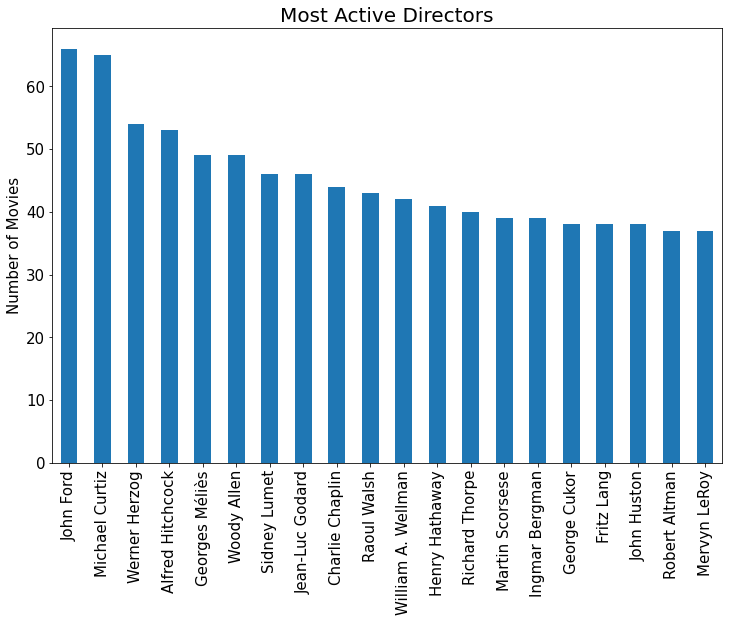

In [151]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [152]:
df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg     9256.621422
Peter Jackson        6528.244659
Michael Bay          6437.466781
James Cameron        5900.610310
David Yates          5334.563196
Christopher Nolan    4747.408665
Robert Zemeckis      4138.233542
Tim Burton           4032.916124
Ridley Scott         3917.529240
Chris Columbus       3866.836869
Roland Emmerich      3798.402596
Ron Howard           3714.152341
J.J. Abrams          3579.215315
Gore Verbinski       3575.339236
George Lucas         3341.550893
Sam Raimi            3193.788606
Francis Lawrence     3183.341910
Clint Eastwood       3100.675162
Bill Condon          3017.298095
Joss Whedon          2963.831071
Name: revenue_musd, dtype: float64

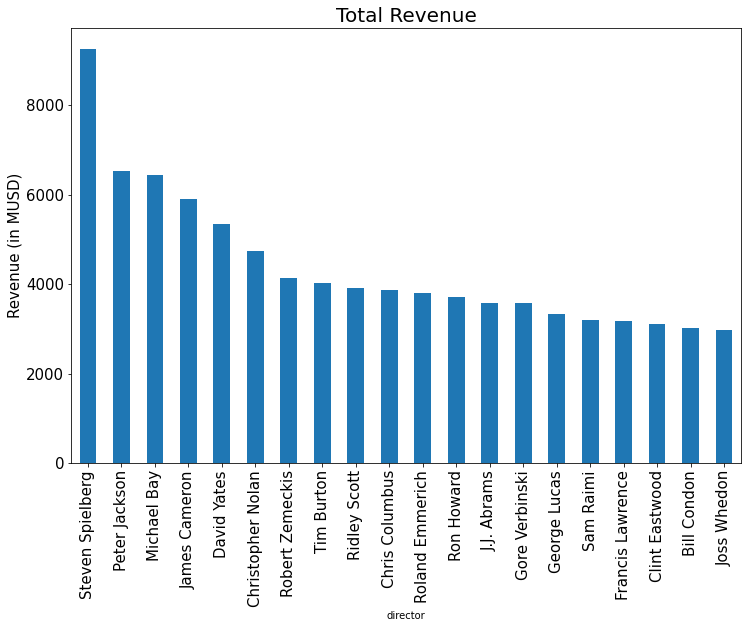

In [153]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [155]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [156]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.700000,14700.0
Christopher Nolan,11,7.618182,67344.0
Quentin Tarantino,10,7.490000,45910.0
Wes Anderson,10,7.370000,11743.0
David Fincher,10,7.350000,37588.0
Martin Scorsese,39,7.218421,35541.0
Peter Jackson,13,7.138462,47571.0
Joel Coen,17,7.023529,18139.0
James Cameron,11,6.927273,33736.0


In [157]:
df.genres = df.genres.astype(str)

In [158]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64